In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
## EXPLORACIÓN DE LA BASE DE DATOS ##
data = pd.read_csv('final.csv')
data=data.drop("serial", axis=1)
data=data.drop("labels", axis=1)
print(data.head())
print("_____________________________________________")
print(data.info())
print("_____________________________________________")
print(data.describe())


     tempmax    tempmin       temp  feelslikemax  feelslikemin  feelslike  \
0  34.053151  24.478082  28.709863     39.757808     25.317808  32.306301   
1  34.086179  25.694309  29.464228     41.338211     28.140650  34.423577   
2  34.573984  25.417886  29.526829     40.464228     26.560163  33.085366   
3  33.020325  25.080488  28.727642     37.878049     26.193496  31.772358   
4  30.660976  24.230894  26.774797     36.586992     24.263415  28.943902   

         dew   humidity     precip  precipprob  ...     winddir  \
0  22.971233  73.508219   2.921726   44.657534  ...  175.595342   
1  23.484553  72.066667   3.783415   39.837398  ...  158.349593   
2  22.580488  69.424390   3.065854   33.333333  ...  202.621138   
3  21.752033  69.297561   6.025203   37.398374  ...  183.544715   
4  24.214634  86.652033  23.336585   96.747967  ...  224.030081   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0       1007.911781   50.747945    3.789863      208.09780

_______________________________________
cases               1.000000
feelslike           0.415344
temp                0.378149
feelslikemin        0.376015
windspeed           0.372895
tempmin             0.364691
feelslikemax        0.304087
tempmax             0.284181
stations            0.261866
visibility          0.248532
dew                 0.179926
winddir             0.023418
precip             -0.015551
sealevelpressure   -0.016806
cloudcover         -0.189715
humidity           -0.208195
solarradiation     -0.215879
solarenergy        -0.217348
precipprob         -0.222055
uvindex            -0.225515
precipcover        -0.236217
conditions         -0.437434
snow                     NaN
snowdepth                NaN
Name: cases, dtype: float64
_______________________________________


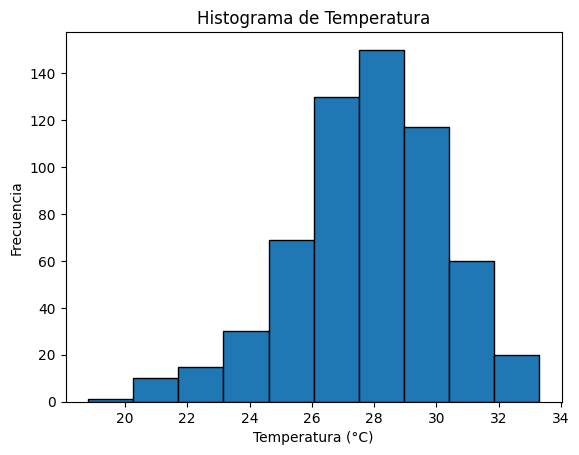

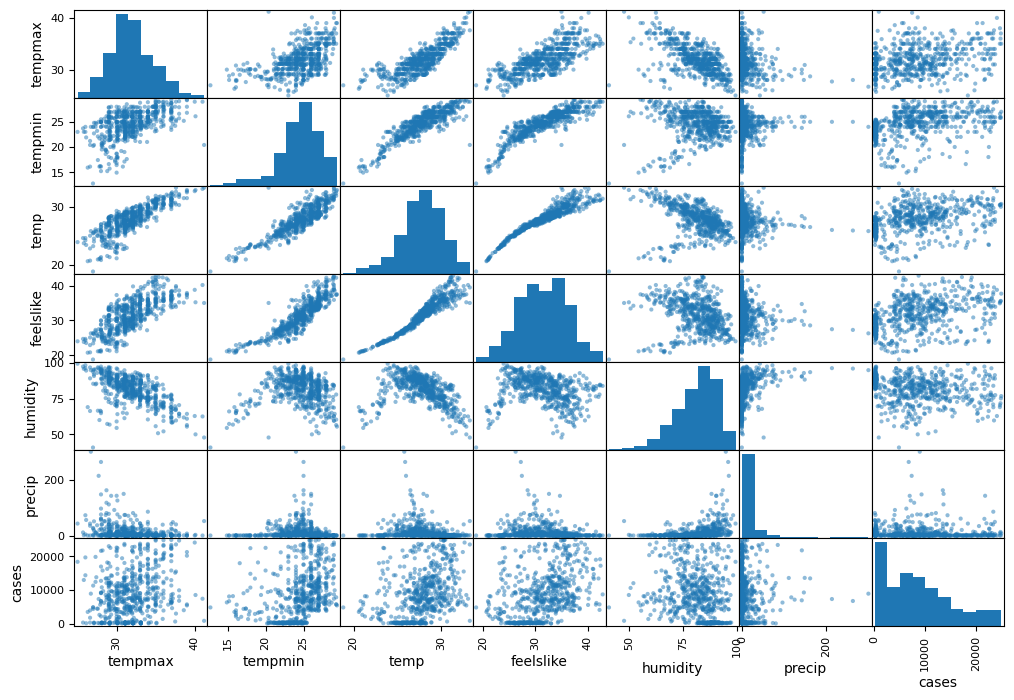

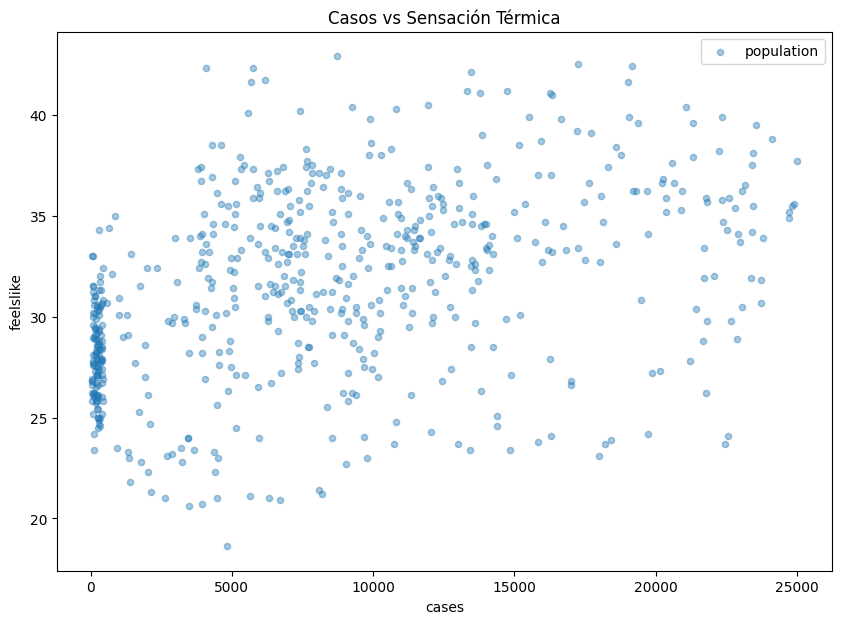

In [3]:
## VISUALIZACIÓN DE DATOS ##

# d) Diagrama de Caja
fig = px.box(data, x='cases', title='Diagrama de Caja')
fig.show()

# c) Gráfica de Barras
fig = plt.hist(data['temp'], bins=10, edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura')

# e) Correlaciones
attributes = ["tempmax", "tempmin","temp", "feelslike", "humidity", "precip", "cases"]
scatter_matrix(data[attributes], figsize=(12, 8))

corr_matrix = data.corr()
print("_______________________________________")
print(corr_matrix["cases"].sort_values(ascending=False))
print("_______________________________________")

data.plot(kind="scatter", x='cases', y='feelslike', title='Casos vs Sensación Térmica', alpha=0.4, label="population", figsize=(10,7))
plt.legend()

In [4]:
## SEPARACIÓN DE LOS DATOS ##
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) #Test = 20%, Entrenamiento = 80%
print("The train set length is: ", len(train_set))
print("The test set length is: ", len(test_set))
print("_______________________________________")

housing = train_set.copy()

The train set length is:  481
The test set length is:  121
_______________________________________


In [5]:
## PREPARACIÓN DE LOS DATOS ##
data = train_set.drop("cases", axis=1) #Separar las etiquetas
data_labels = train_set["cases"].copy()
print(data_labels)

9        150.0
375    12956.0
524    10453.0
188      296.0
131      336.0
        ...   
71      7399.0
106     3216.0
270     7413.0
435    16735.0
102     3464.0
Name: cases, Length: 481, dtype: float64


In [6]:
#Custom Transformers
#Añade nuevos atributos a partir de la combinación de otros ya existentes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_temp_humidity=True):
        self.add_temp_humidity = add_temp_humidity

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self

    def transform(self, X):
        X_temp = X.copy()
        if self.add_temp_humidity:
            X_temp['temp_humidity'] = X_temp['temp'] * X_temp['humidity']
        return X_temp

#Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Escalar, estandarizar datos
num_pipeline = Pipeline([
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
data_num_tr = num_pipeline.fit_transform(data)

from sklearn.compose import ColumnTransformer
num_attribs = list(data)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs)
])

print(full_pipeline)
print("_______________________________________")

data_prepared = full_pipeline.fit_transform(data)
print(data_prepared[0])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['tempmax', 'tempmin', 'temp', 'feelslikemax',
                                  'feelslikemin', 'feelslike', 'dew',
                                  'humidity', 'precip', 'precipprob',
                                  'precipcover', 'snow', 'snowdepth',
                                  'windspeed', 'winddir', 'sealevelpressure',
                                  'cloudcover', 'visibility', 'solarradiation',
                                  'solarenergy', 'uvindex', 'conditions',
                                  'stations'])])
_______________________________________
[-0.41591658 -0.52956861 -0.60119357 -0.43944977 -0.58591243 -0.71158

Predictions: [ 3834.50344724 13383.98962401  7800.81632752  5725.72802851
  4168.72593124]
Labels: [150.0, 12956.0, 10453.0, 296.0, 336.0]
RMSE de Regresión Lineal:  5218.680899377129
_____________________________
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
Best Score: -87059605.80285476
Predictions: [ 3834.50344724 13383.98962401  7800.81632752  5725.72802851
  4168.72593124]
Labels: [150.0, 12956.0, 10453.0, 296.0, 336.0]
RMSE de Regresión Lineal:  5218.680899377129
MAE de Regresión Lineal:  4245.922174134461
R² de Regresión Lineal:  0.4191996150206184
_____________________________


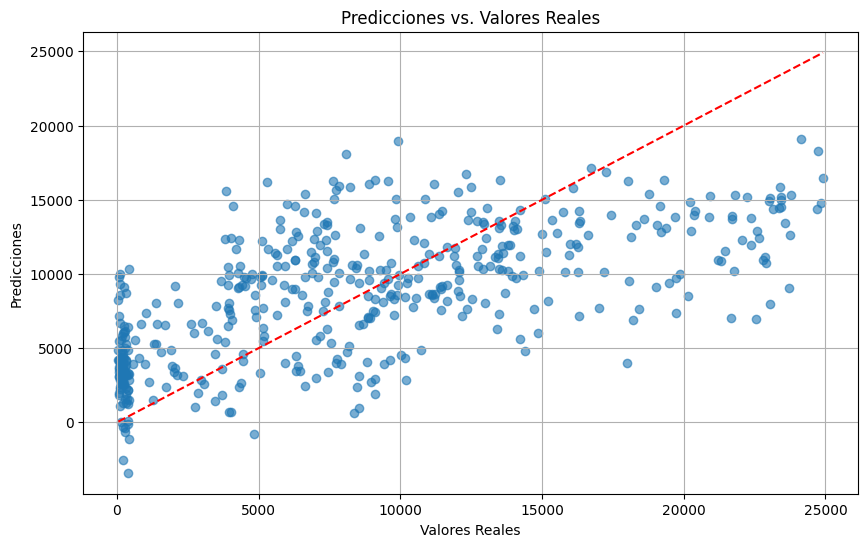

In [7]:
## Entrenamiento de Modelos ##
# Regresión Lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #fit_intercept: Calculate intercept, the mean value of the response variable when all predictor variables are zero
                             #copy_x : If True, X will be copied; else, it may be overwritten.
                             #n_jobs: The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
                             #positive: When set to True, forces the coefficients to be positive.
lin_reg.fit(data_prepared, data_labels)

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5] #iloc es para seleccionar filas o columnas de un dataframe
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

from sklearn.metrics import mean_squared_error #Medir el RMSE (Raíz del Error Cuadrático Medio)
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE de Regresión Lineal: ", lin_rmse)
print("_____________________________")

# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, 5, 10, -1]
}
#Setup
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(data_prepared, data_labels)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

lin_reg = LinearRegression(copy_X=True, fit_intercept= True, positive= False)
lin_reg.fit(data_prepared, data_labels)
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5] #iloc es para seleccionar filas o columnas de un dataframe
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

from sklearn.metrics import mean_absolute_error, r2_score

# Predicciones con el modelo entrenado
data_predictions = lin_reg.predict(data_prepared)

# Calcular las métricas
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_r2 = r2_score(data_labels, data_predictions)

# Imprimir los resultados
print("RMSE de Regresión Lineal: ", lin_rmse)
print("MAE de Regresión Lineal: ", lin_mae)
print("R² de Regresión Lineal: ", lin_r2)
print("_____________________________")

import matplotlib.pyplot as plt

# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(data_labels, data_predictions, alpha=0.6)
plt.plot([data_labels.min(), data_labels.max()], [data_labels.min(), data_labels.max()], color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()

#Save model
import joblib
joblib.dump(lin_reg, "lin_reg.pkl")
lin_reg_loaded = joblib.load("lin_reg.pkl")

#Save pipeline
joblib.dump(full_pipeline, 'pipeline.joblib')
pipeline_loaded = joblib.load('pipeline.joblib')

# Resultados de Regresión Lineal
Las métricas obtenidas fueron:

*   RMSE =  5218.680899377129
*   MAE = 4245.922174134461

Que se quedan cortos con respecto a la literatura previamente consultada, en la cual se obtuvo:

* RMSE = 268.323

* MAE = 164.106

Algunos posibles cursos de acción para mejorar los resultados podrían ser la utilización de métodos de regularización como Lasso Regression, la creación de nuevas características a partir de las existentes y la extensión de la base de datos.

In [8]:
#Algoritmos SVM
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

#Función para crear las métricas de manera más sencilla
def evaluate_model(model, data, labels):
    predictions = model.predict(data)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    return rmse, mae, r2

# Kfold para regresion
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Lista vacía para guardar los resultados y mostrarlos al final
results = []

## Modelo SVM Lineal ##
param_grid_lsvr = {
    'C': [0.01, 0.1, 1, 10, 100],
}
grid_search_lsvr = GridSearchCV(LinearSVR(), param_grid_lsvr, cv=kf)
grid_search_lsvr.fit(data_prepared, data_labels)
print("Best parameters for LinearSVR: ", grid_search_lsvr.best_params_)

# Evaluación del modelo
lsvr_rmse, lsvr_mae, lsvr_r2 = evaluate_model(grid_search_lsvr.best_estimator_, data_prepared, data_labels)
results.append({"Model": "LinearSVR", "RMSE": lsvr_rmse, "MAE": lsvr_mae, "R²": lsvr_r2})

## Modelo polinomial ##
param_grid_poli = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'coef0': [0, 0.5, 1],
}
grid_search_poli = GridSearchCV(SVR(), param_grid_poli, cv=kf)
grid_search_poli.fit(data_prepared, data_labels)
print("Best parameters for polinomial kernel: ", grid_search_poli.best_params_)

# Evaluación del modelo
psvr_rmse, psvr_mae, psvr_r2 = evaluate_model(grid_search_poli.best_estimator_, data_prepared, data_labels)
results.append({"Model": "SVR (polinomial)", "RMSE": psvr_rmse, "MAE": psvr_mae, "R²": psvr_r2})

## Modelo Gaussiano ##
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
}
grid_search_rbf = GridSearchCV(SVR(), param_grid_rbf, cv=kf)
grid_search_rbf.fit(data_prepared, data_labels)
print("Best parameters for RBF kernel: ", grid_search_rbf.best_params_)

# Evaluación del modelo
rsrv_rmse, rsvr_mae, rsvr_r2 = evaluate_model(grid_search_rbf.best_estimator_, data_prepared, data_labels)
results.append({"Model": "SVR (RBF)", "RMSE": rsrv_rmse, "MAE": rsvr_mae, "R²": rsvr_r2})

#Mostrar los resultados
results_df = pd.DataFrame(results)
print(results_df)


Best parameters for LinearSVR:  {'C': 100}
Best parameters for polinomial kernel:  {'C': 100, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
Best parameters for RBF kernel:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
              Model         RMSE          MAE        R²
0         LinearSVR  5758.479050  4197.435193  0.292835
1  SVR (polinomial)  5361.683136  4031.770422  0.386933
2         SVR (RBF)  6167.040605  4915.908761  0.188929


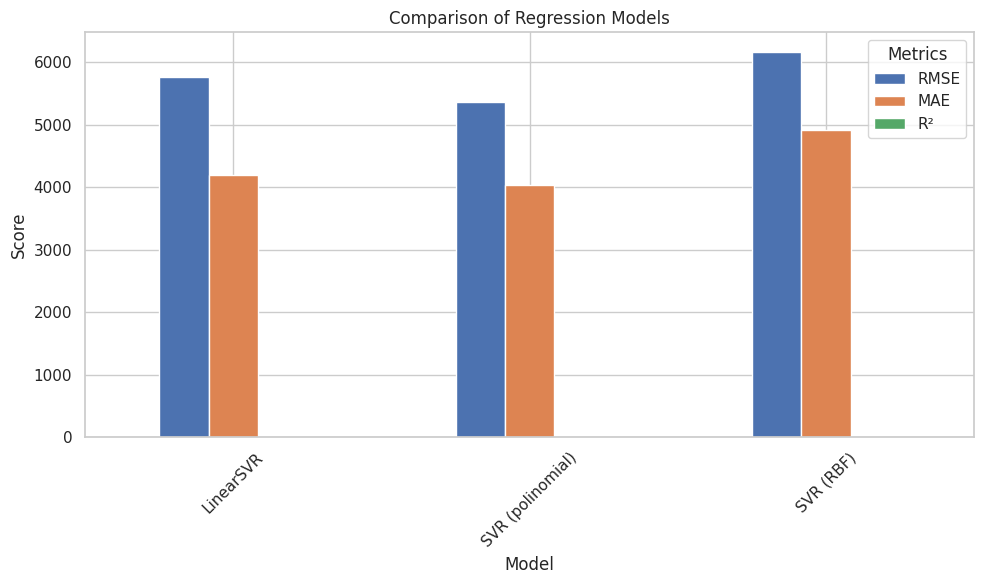

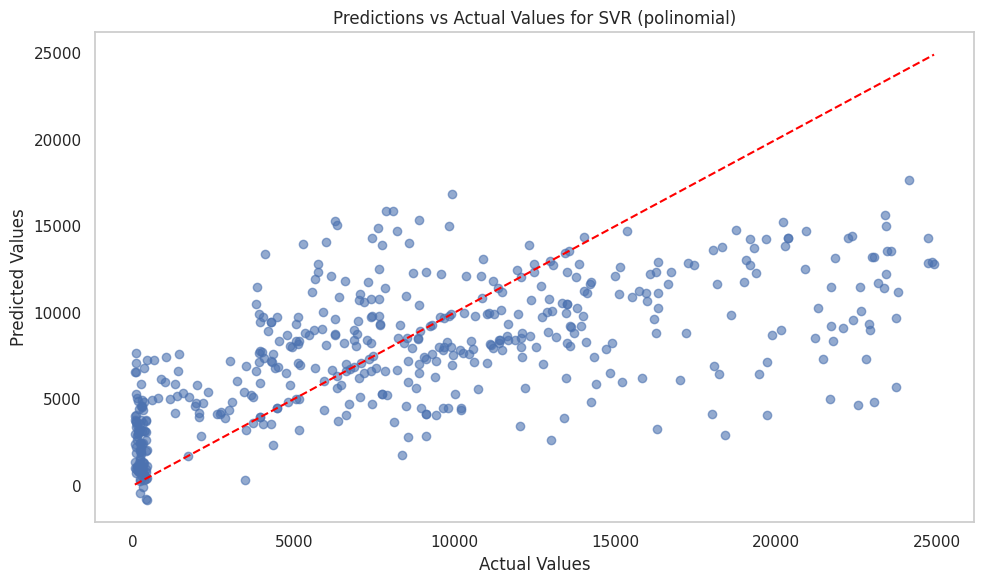

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Comparación de los modelos
sns.set(style="whitegrid")
metrics = ['RMSE', 'MAE', 'R²']
results_df_metrics = results_df.set_index('Model')[metrics]
results_df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Diagrama para mostrar Valores Reales vs Predicciones del mejor modelo
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
if "LinearSVR" in best_model_name:
    best_model = grid_search_lsvr.best_estimator_
elif "SVR (polinomial)" in best_model_name:
    best_model = grid_search_poli.best_estimator_
else:  # SVR (RBF)
    best_model = grid_search_rbf.best_estimator_

predictions = best_model.predict(data_prepared)

plt.figure(figsize=(10, 6))
plt.scatter(data_labels, predictions, alpha=0.6)
plt.plot([data_labels.min(), data_labels.max()], [data_labels.min(), data_labels.max()], color='red', linestyle='--')
plt.title(f'Predictions vs Actual Values for {best_model_name}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()

#Guardar mejor modelo
#Save model
joblib.dump(best_model, "SVM.pkl")
SVM_loaded = joblib.load("SVM.pkl")



# Resultados Regresión SVM
# SVM Lineal
RMSE: 5758.51

MAE: 4197.2

# SVM Polinomial
RMSE: 5361.68

MAE: 4031.77

# SVM Gaussiano
RMSE: 6167.04

MAE: 4915.90

Como se puede observar, de los tres algoritmos SVM el que obtuvo mejores resultados fue el polinomial, sin embargo los valores aún no son satisfactorios. La regresión lineal sigue siendo el mejor modelo hasta ahora.